In [6]:
from transformers import VisionEncoderDecoderModel
from transformers import ViTFeatureExtractor, RobertaTokenizer, TrOCRProcessor
from transformers import VisionEncoderDecoderModel
from transformers import TrOCRProcessor
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np
import pandas as pd
import random

In [2]:
encode = 'google/vit-base-patch16-224-in21k'
decode = 'd42kw01f/Tamil-RoBERTa'

feature_extractor=ViTFeatureExtractor.from_pretrained(encode)
tokenizer = RobertaTokenizer.from_pretrained(decode)
processor = TrOCRProcessor(feature_extractor=feature_extractor, tokenizer=tokenizer)

model = VisionEncoderDecoderModel.from_pretrained("/Users/dishantpadalia/IITB/random/checkpoint-22000")

/Users/dishantpadalia/opt/miniconda3/envs/trocr/lib/python3.10/site-packages/transformers/models/trocr/processing_trocr.py:44: FutureWarning: The `feature_extractor` argument is deprecated and will be removed in v4.27, use `image_processor` instead.
  warnings.warn(


In [7]:
train_text_file = "../random/ta/train.txt"
test_text_file = "../../random/ta/test.txt"
val_text_file = "../random/ta/val.txt"
root_dir = "../../random/ta/"

def dataset_generator(data_path):
    with open(data_path) as f:
        dataset = f.readlines()
    # counter = 0

    with open("../../random/ta/vocab.txt") as f:
        vocab = f.readlines()

    for j in range(len(vocab)):
        vocab[j] = vocab[j].split("\n")[0].strip()

    dataset_list = []
    for i in range(len(dataset)):
        # if counter > 30000:
        #     break
        image_id = dataset[i].split("\n")[0].split(',')[0].strip()
        # vocab_id = int(dataset[i].split(",")[1].strip())
        vocab_id = int(dataset[i].split("\n")[0].split(',')[1].strip())
        # text = dataset[i].split("\n")[0].split(' ')[1].strip()
        text = vocab[vocab_id]
        row = [image_id, text]
        dataset_list.append(row)
        # counter += 1

    dataset_df = pd.DataFrame(dataset_list, columns=['file_name', 'text'])
    # dataset_df.head()
    return dataset_df
    
# train_df = dataset_generator(train_text_file)
test_df = dataset_generator(test_text_file)
# val_df = dataset_generator(val_text_file)

In [24]:
def preview():
    random_element = random.randint(0, len(test_df))
    image_path = root_dir + test_df['file_name'][random_element]
    ground_truth = test_df['text'][random_element]
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    plt.imshow(image)
    print(f"GROUND TRUTH TEXT: {ground_truth}")
    print(f"GENERATED TEXT: {generated_text}")

GROUND TRUTH TEXT: அமைச்சரவை
GENERATED TEXT: அமைச்சாலை


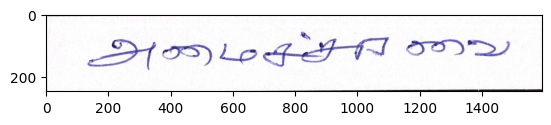

In [25]:
preview()

GROUND TRUTH TEXT: உறவாடிவிட்டு
GENERATED TEXT: உறவாவிட்டு


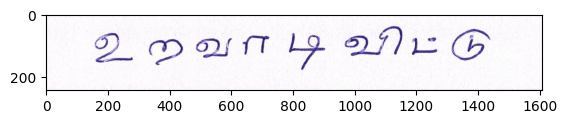

In [26]:
preview()

GROUND TRUTH TEXT: தொடர்புடனும்
GENERATED TEXT: தொடர்புடனும்


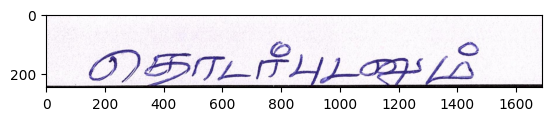

In [27]:
preview()

GROUND TRUTH TEXT: கண்மூடித்
GENERATED TEXT: கன்மூடித்


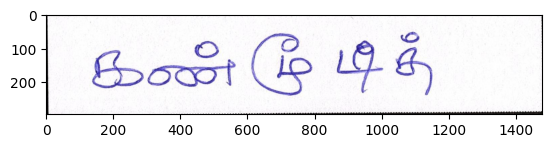

In [28]:
preview()

GROUND TRUTH TEXT: அமைதிக்குப்
GENERATED TEXT: அமைவிக்குப்


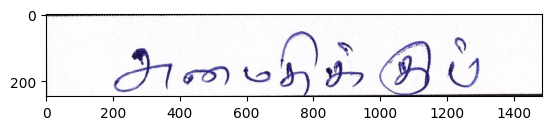

In [29]:
preview()

GROUND TRUTH TEXT: நேர்வதில்லை
GENERATED TEXT: நேர்வதில்லை


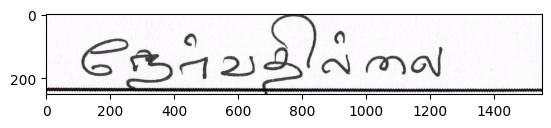

In [30]:
preview()

GROUND TRUTH TEXT: லீவ்
GENERATED TEXT: லீவீ


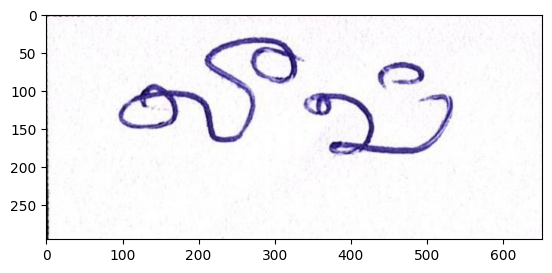

In [31]:
preview()

GROUND TRUTH TEXT: குடிசை
GENERATED TEXT: குடிசை


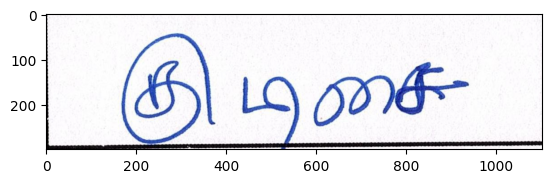

In [32]:
preview()

GROUND TRUTH TEXT: பெருக்கிகாட்டியிருந்தால்
GENERATED TEXT: பெருக்கிகாட்டியிருந்தால்


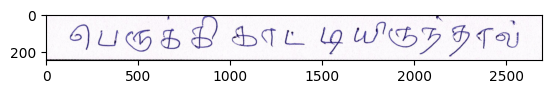

In [33]:
preview()

GROUND TRUTH TEXT: உதட்டின்
GENERATED TEXT: உதட்டின்


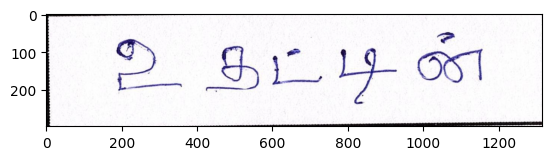

In [34]:
preview()

GROUND TRUTH TEXT: திடார்னு
GENERATED TEXT: திடார்னு


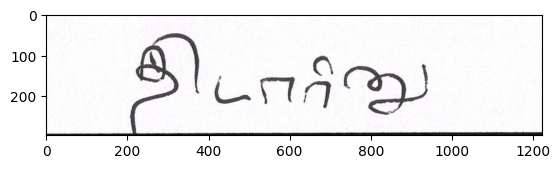

In [35]:
preview()

GROUND TRUTH TEXT: உரையாற்றினர்
GENERATED TEXT: உரையாற்றின்


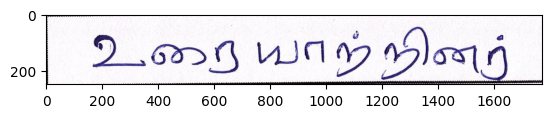

In [36]:
preview()

GROUND TRUTH TEXT: பச்சைத்தக்காளியை
GENERATED TEXT: பீச்சைக்காளிகளிடைய


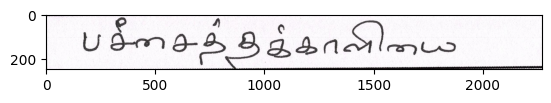

In [37]:
preview()

GROUND TRUTH TEXT: பிறர்
GENERATED TEXT: பிறர்


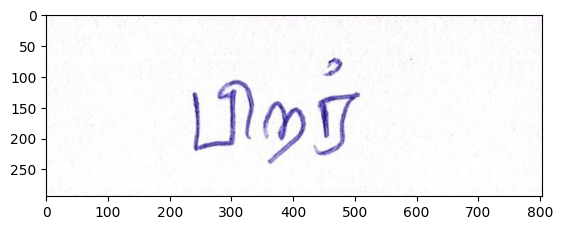

In [38]:
preview()

GROUND TRUTH TEXT: இந்தியாவுக்குச்
GENERATED TEXT: இந்தியாவுக்குச்


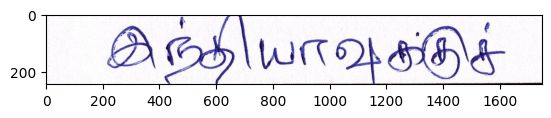

In [39]:
preview()